# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#宣告採用序列模型
model = Sequential()

In [8]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 400,906
Trainable params: 400,906
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [12]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 21s 430us/step - loss: 0.2491 - acc: 0.9240 - val_loss: 0.1122 - val_acc: 0.9657
Epoch 2/10
48000/48000 [==============================] - 19s 392us/step - loss: 0.1125 - acc: 0.9667 - val_loss: 0.1040 - val_acc: 0.9706
Epoch 3/10
48000/48000 [==============================] - 19s 396us/step - loss: 0.0776 - acc: 0.9769 - val_loss: 0.1180 - val_acc: 0.9668
Epoch 4/10
48000/48000 [==============================] - 27s 566us/step - loss: 0.0629 - acc: 0.9812 - val_loss: 0.1000 - val_acc: 0.9740
Epoch 5/10
48000/48000 [==============================] - 30s 626us/step - loss: 0.0504 - acc: 0.9852 - val_loss: 0.1226 - val_acc: 0.9698
Epoch 6/10
48000/48000 [==============================] - 25s 526us/step - loss: 0.0435 - acc: 0.9870 - val_loss: 0.1091 - val_acc: 0.9722
Epoch 7/10
48000/48000 [==============================] - 26s 532us/

# 以圖形顯示訓練過程

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

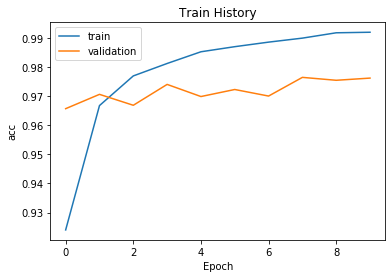

In [14]:
show_train_history(train_history,'acc','val_acc')

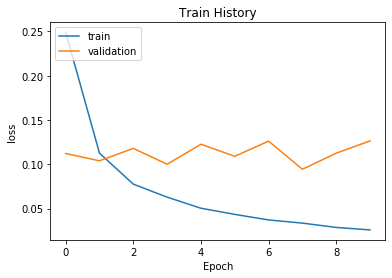

In [15]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [16]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - ETA:  - 1s 86us/step

accuracy= 0.9787
